This is Day 2 of Week 1.
Today we're building a Data visualization dashboard.

In [ ]:
# run at top of notebook; installs will be fast in Colab
!pip install --quiet plotly ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.0 MB/s eta 0:00:00


numpy: provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.

pandas: offers data structures and tools for data analysis and manipulation, primarily the DataFrame, which is a two-dimensional labeled data structure.

matplotlib.pyplot: a plotting library that provides a MATLAB-like interface for creating static, animated, and interactive visualizations in Python.

seaborn: a statistical data visualization library built on top of matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

plotly.express: a high-level, easy-to-use library for creating interactive, publication-quality figures with a single function call.

plotly.graph_objects: a low-level, more granular library that provides a highly customizable interface for building complex and specific plots.

ipywidgets: allows for the creation of interactive user interfaces, such as sliders, buttons, and text boxes, directly within Jupyter notebooks.

IPython.display: provides tools to display rich content and manage output within an IPython environment, like a Jupyter notebook.

sns.set(style='whitegrid'): configures the aesthetic style of seaborn plots to a theme with a white background and grid lines.

%matplotlib inline: a magic command in Jupyter notebooks that ensures plots are rendered directly within the output cells of the notebook.

In [ ]:
# Day 2: imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display, clear_output

sns.set(style='whitegrid')
%matplotlib inline

Today also we'll be using the Titanic Dataset only.

In [ ]:
#seaborn builtin (quick)
df = sns.load_dataset('titanic')

# quick look
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# make a safe copy
df = df.copy()
# basic imputations
if 'age' in df.columns:
    df['age'] = df['age'].fillna(df['age'].median())
if 'fare' in df.columns:
    df['fare'] = df['fare'].fillna(df['fare'].median())
if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# make sure types are convenient
if 'pclass' in df.columns:
    df['pclass'] = df['pclass'].astype(str)

# quick summary
print(df.shape)
print(df.isnull().sum())

(891, 15)
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


While pclass is often represented with numerical values (1, 2, 3), it's important to treat it as a categorical variable because the numbers don't represent a continuous scale. You wouldn't, for example, calculate the average pclass of a group of passengers. The code snippet df['pclass'] = df['pclass'].astype(str) is a common step to explicitly convert this column's data type to a string, ensuring it's handled correctly as a category rather than a number.

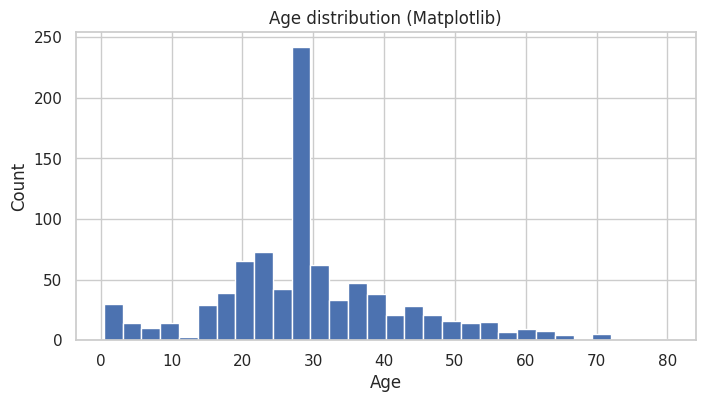

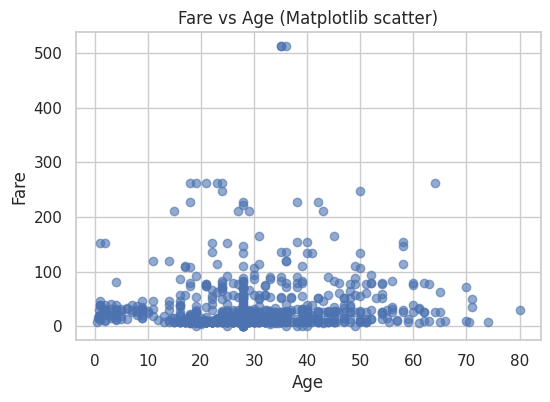

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(df['age'].dropna(), bins=30)
plt.title('Age distribution (Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# scatter example
if 'age' in df.columns and 'fare' in df.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df['age'], df['fare'], alpha=0.6)
    plt.title('Fare vs Age (Matplotlib scatter)')
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.show()

In a scatter plot, alpha is a parameter that controls the transparency of the data points. Its value ranges from 0 to 1. A value of 0 means the points are completely transparent (invisible), while a value of 1 means they are fully opaque (solid). 👻

Why is Alpha Useful?
Alpha is especially useful when dealing with a large number of data points that overlap. Without transparency, dense areas on the plot would appear as a single, solid mass of color, making it impossible to see the distribution of points within that area.

By setting a lower alpha value (e.g., 0.2 or 0.3), you can make the points semi-transparent. This allows you to see the density of data in different regions of the plot: areas with many overlapping points will appear as a darker shade, while areas with fewer points will be lighter. This gives a much clearer visual representation of where the data is concentrated.

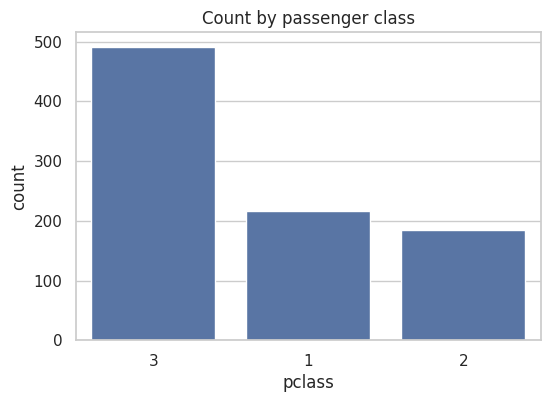

In [ ]:
# countplot: classes
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='pclass')
plt.title('Count by passenger class')
plt.show()

this is a count plot of 6 by 4 inches
this graph shows the count of each passenger class, 3rd class passengers being the most, followed by 1st class and then 2nd class passengers.


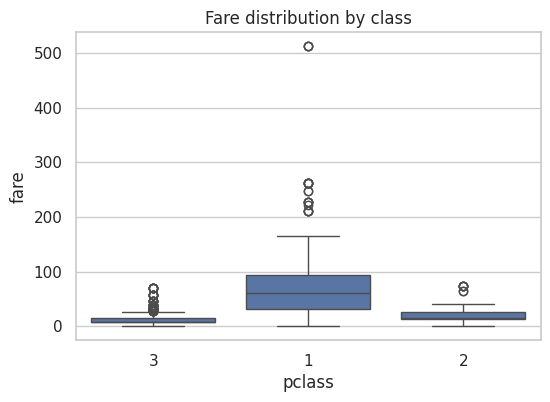

In [ ]:

# boxplot: fare by class
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='pclass', y='fare')
plt.title('Fare distribution by class')
plt.show()

The median fare for first-class passengers is around $75.

The middle 50% of first-class fares (the interquartile range/the box) fall between approximately $50 and $100.

The whiskers extend to about $200.

There are numerous outliers for this class, with fares reaching as high as $500+.
This indicates that a few passengers paid exceptionally high fares.

Class 2
The median fare for second-class passengers is just under $25.

The interquartile range (the box) is very narrow, showing that the middle 50% of fares were concentrated between about $20 and $30.

The whiskers extend to around $65.

There are a few outliers with fares between $65 and $80.

Class 3
The median fare for third-class passengers is the lowest, at around $8.

The interquartile range is also very narrow, with the middle 50% of fares falling between about $7 and $15.

The whiskers extend to approximately $30.

There are a handful of outliers with fares up to about $60.

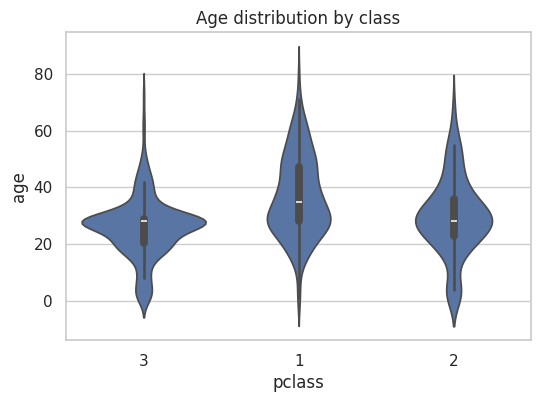

In [ ]:

# violinplot for distribution shape
plt.figure(figsize=(6,4))
sns.violinplot(data=df, x='pclass', y='age')
plt.title('Age distribution by class')
plt.show()

Class 1: This class has a wider distribution of ages, with a notable peak around the late 30s. The median age is higher than the other two classes, and it includes a broader range of older passengers, indicated by the wide upper part of the violin.

Class 2: The age distribution for this class is more uniform than class 1, with a median age slightly lower than class 1.

Class 3: This class shows the youngest age distribution. The violin is widest around the early 20s, and the median age is the lowest of the three classes. The overall shape is skewed toward younger ages, suggesting a higher proportion of young adults.

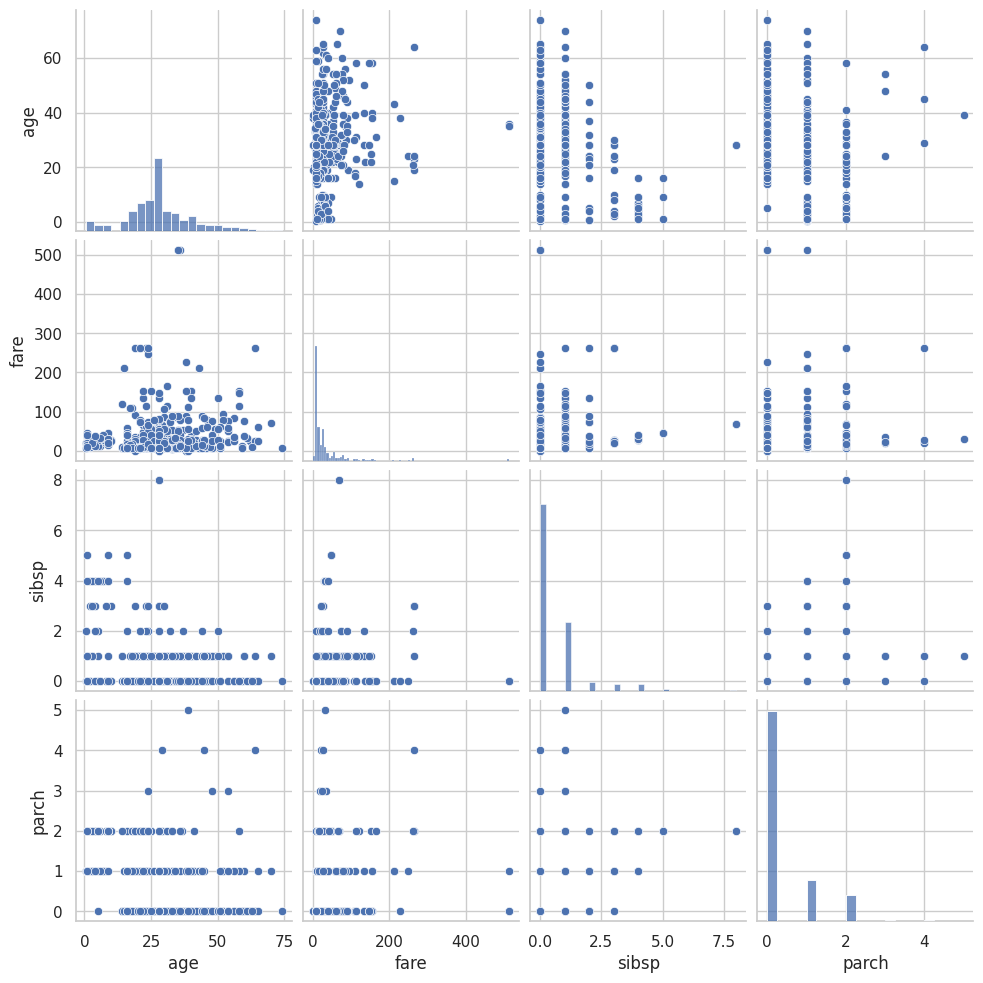

In [ ]:
# pairplot on a subset (drop na for speed)
cols = [c for c in ['age','fare','sibsp','parch'] if c in df.columns]
if len(cols) >= 2:
    sns.pairplot(df[cols].dropna().sample(min(500, len(df))))

.sample(min(500, len(df))): Randomly samples up to 500 rows from the resulting DataFrame. This is done to speed up the plotting process, especially if the DataFrame is very large. min(500, len(df)) ensures you don't try to sample more rows than are available

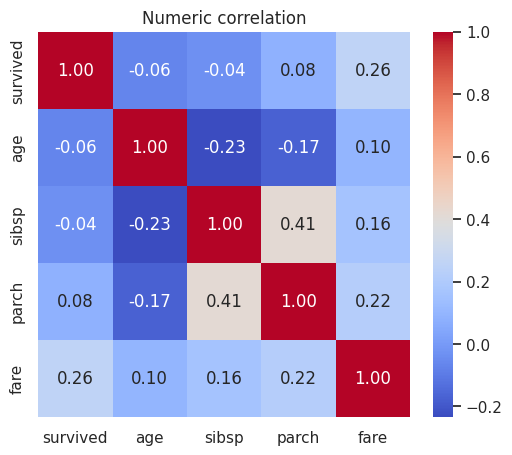

In [ ]:

# correlation heatmap
num = df.select_dtypes(include=[np.number])
plt.figure(figsize=(6,5))
sns.heatmap(num.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Numeric correlation')
plt.show()

**Code**

The code first isolates numerical columns from the DataFrame df. It then calculates the correlation matrix using num.corr(). Finally, it uses seaborn.heatmap to plot this matrix, annotating each cell with its correlation value formatted to two decimal places, and using a coolwarm color scheme to distinguish between positive (red) and negative (blue) correlations.

**Chart**

The heatmap displays the Pearson correlation coefficient for each pair of variables.

Positive correlation (red, closer to 1) means variables increase together. For example, sibsp and parch have a moderate positive correlation (0.41), which makes sense as these represent family members.

Negative correlation (blue, closer to -1) means as one variable increases, the other decreases. The relationship between age and sibsp (-0.23) suggests that older passengers tended to have fewer siblings/spouses on board.

Weak correlation (light colors, closer to 0) indicates little to no linear relationship. The correlation between age and survived is a very weak -0.06, suggesting age had a minimal impact on survival.

The diagonal line shows a perfect correlation of 1.00 because a variable is always perfectly correlated with itself.

In [ ]:
# interactive age histogram
fig = px.histogram(df, x='age', nbins=30, color='survived', title='Age distribution by survival (Plotly)')
fig.show()

In [ ]:
# interactive scatter with tooltips
if 'age' in df.columns and 'fare' in df.columns:
    fig2 = px.scatter(df, x='age', y='fare', color='pclass', hover_data=['sex','survived'], title='Fare vs Age (Plotly)')
    fig2.show()

In [22]:
def update_plots(age_range, pclass_values, survived_val, embarked_values):
  age_min, age_max = age_range #this is a syntax for how we can divide a tuple into
  #two separate variables.
  #It's a convenient way to assign the first item of the tuple to age_min and the second item to age_max in a single line.
  #This is called tuple unpacking.
  df_f = df[(df['age']>=age_min)&(df['age']<=age_max)]#checking if the age is valid then making a new dataframe
  if pclass_values:
    df_f=df_f[df_f['pclass'].isin(list(pclass_values))]
  if survived_val !='all':
    df_f=df_f[df_f['survived']==int(survived_val)]
  if embarked_values:
    df_f=df_f[df_f['embarked'].isin(list(pclass_values))]
  #This line of code is filtering a DataFrame named df_f.
  #It checks if the embarked column in df_f contains any of the values present in the list pclass_values.
  #If embarked_values is not empty, it returns a new DataFrame df_f that only includes
  #rows where the embarked value is found in pclass_values.
  #This is often done to filter data based on user selections from a list of options.
  clear_output(wait=True)
  display(ui)# re-display controls on each update

  #plotly's histogram
  fig1 = px.histogram(df_f, x='age', nbins=30, color='survived', title='Age distribution by survival (Plotly)')
  fig1.update_layout(height=300)
  fig1.show()

  #Plotly's box plot
  fig2 = px.box(df_f, x='pclass', y='fare', color='pclass', title='Fare by Class')
  fig2.update_layout(height=300)
  fig2.show()
  #seaborn heatmap on numeric
  numeric = df_f.select_dtypes(include=[np.number]) #selecting all columns with numbers and making a new dataframe
  if numeric.shape[1] >= 2: #checking if number of columns are more than two
      plt.figure(figsize=(5,4))
      sns.heatmap(numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
      #.corr calculates the Pearson correlation coefficient for all pairs of columns in the dataframe,
      #fmt formats the displayed correlation numbers to have two decimal places (e.g., 0.41 instead of 0.41324).
      plt.title('Correlation (filtered)')
      plt.show()

#widgets
age_slider = widgets.IntRangeSlider(value=[int(df['age'].min()), int(df['age'].max())], min=int(df['age'].max()),  max=int(df['age'].max()), step=1, description='Age')

'''age_slider = widgets.IntRangeSlider(...): Creates a slider that lets a user select a range of integer values for age.
      widgets.IntRangeSlider: The specific type of widget, for selecting an integer range.
      value=[int(df['age'].min()), int(df['age'].max())]: Sets the initial range of the slider from the minimum to the maximum age found in the df DataFrame.
      min=int(df['age'].min()): Sets the minimum value the slider can go to.
      step=1: Moves the slider in increments of 1 year.
      description='Age': The label that appears next to the slider.'''

pclass_sel = widgets.SelectMultiple(options=sorted(df['pclass'].unique()), value=tuple(sorted(df['pclass'].unique())), description='Pclass')

'''pclass_sel = widgets.SelectMultiple(...): Creates a widget that allows selecting multiple passenger classes from a list.
      widgets.SelectMultiple: The widget type for multiple selections.
      options=sorted(df['pclass'].unique()): The available choices are the unique passenger classes (1, 2, 3), sorted in order.
      value=tuple(sorted(df['pclass'].unique())): Sets the initial selected values to include all unique classes.
      description='Pclass': The label for the widget.'''
survived_dropdown = widgets.Dropdown(options=[('All','all'), ('Survived',1), ('Not survived',0)], value='all', description='Survived')
'''survived_dropdown = widgets.Dropdown(...): Creates a simple dropdown menu to select survival status.
      widgets.Dropdown: The widget type for a single selection from a list.
      options=[('All','all'), ('Survived',1), ('Not survived',0)]: A list of tuples, where the first item is the displayed text and the second is the value returned.
      value='all': The default selection is 'All'.
      description='Survived': The label for the dropdown.'''
embark_sel = widgets.SelectMultiple(options=sorted(df['embarked'].unique()), value=tuple(sorted(df['embarked'].unique())), description='Embarked')

'''embark_sel = widgets.SelectMultiple(...): Similar to pclass_sel, this creates a multiple-selection widget for the ports of embarkation.
    widgets.SelectMultiple: The widget type.
    options=sorted(df['embarked'].unique()): The unique ports ('S', 'C', 'Q') are listed as options.
    value=tuple(sorted(df['embarked'].unique())): All ports are selected by default.
    description='Embarked': The label for the widget.'''

ui = widgets.VBox([age_slider, widgets.HBox([pclass_sel, survived_dropdown, embark_sel])])
out = widgets.interactive_output(update_plots, {'age_range': age_slider, 'pclass_values': pclass_sel, 'survived_val': survived_dropdown, 'embarked_values': embark_sel})

  #display controls + output
display(ui, out)



Output()